In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

plt.rc('axes', titlesize=20)
plt.rc('figure', figsize=(16, 10))

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["cases", "test_total"]]

evolution_df = df.diff()[["cases", "deaths", "test_total"]].iloc[1:]

In [3]:
smas = pd.DataFrame()
smas["cases_SMA_7"] = evolution_df["cases"].rolling(window=7).mean()
smas["cases_SMA_21"] = evolution_df["cases"].rolling(window=21).mean()

smas["deaths_SMA_7"] = evolution_df["deaths"].rolling(window=7).mean()
smas["deaths_SMA_21"] = evolution_df["deaths"].rolling(window=21).mean()

def to_pct_string(frame):
    new_frame = pd.DataFrame()
    for column in frame.columns:
        new_frame[column] = pd.Series(["{0:.2f}%".format(val * 100) for val in frame[column]], index = frame.index)
    return new_frame

# Evolution Charts

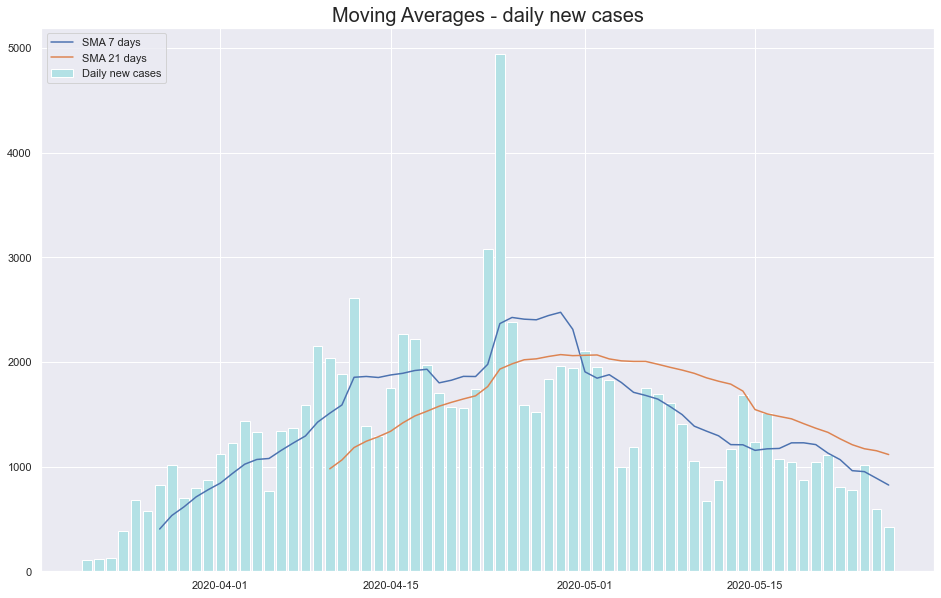

In [4]:
@interact
def show_change_chart(days=widgets.IntSlider(min=1, max=len(smas), value=len(smas)), 
                      show_cases=True, 
                      show_deaths=False,
                      show_totals=widgets.ToggleButtons(options=['All', 'None', 'Cases', 'Deaths'], value='Cases')):
    data = smas.iloc[-days:]
    evolution_local = evolution_df.iloc[-days:]
    if show_cases:
        plt.plot(data["cases_SMA_7"], label="SMA 7 days")
        plt.plot(data["cases_SMA_21"], label="SMA 21 days")
        
    if show_deaths:
        plt.plot(data["deaths_SMA_7"], label="SMA 7 days")
        plt.plot(data["deaths_SMA_21"], label="SMA 21 days")
        
    if show_totals in ['All', 'Cases']:
        plt.bar(evolution_local.index, evolution_local["cases"], label="Daily new cases", color="#b3e1e5")
        
    if show_totals in ['All', 'Deaths']:
        plt.bar(evolution_local.index, evolution_local["deaths"], label="Daily deaths")
        
    plt.legend(loc=2)
    plt.title("Moving Averages - daily new cases")
    plt.show()

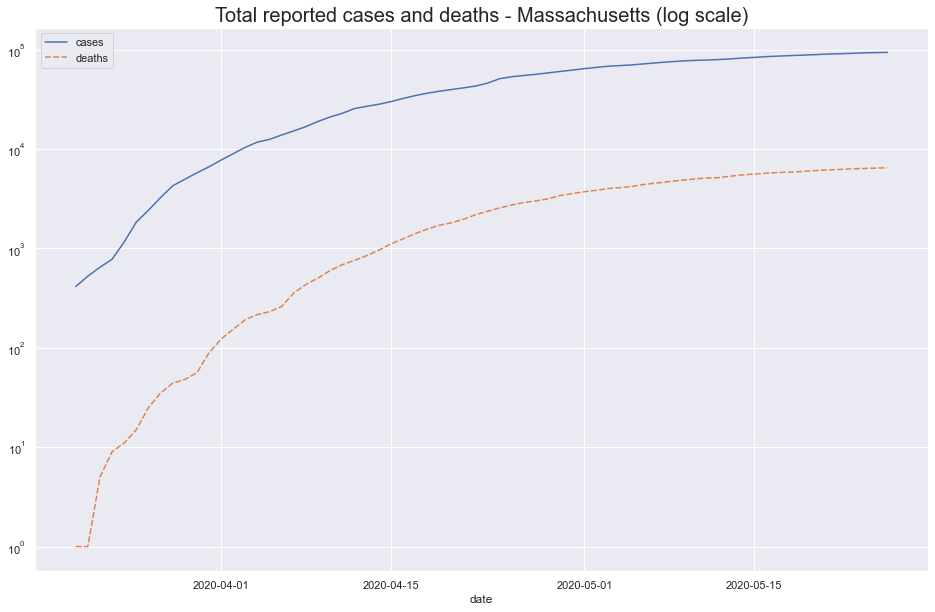

In [5]:
# plt.figure(figsize=(16, 10))

@interact
def show_cases(scale=['log', 'linear']):
    ax = sns.lineplot(data=cases_df)
    ax.set_yscale(scale)

    plt.title("Total reported cases and deaths - Massachusetts ({} scale)".format(scale))
    plt.show()

In [6]:
@interact
def show_pct_change(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return to_pct_string(smas.pct_change().iloc[-days:])

,cases_SMA_7,cases_SMA_21,deaths_SMA_7,deaths_SMA_21
date,,,,
2020-05-20,-1.40%,-3.10%,-5.77%,-4.45%
2020-05-21,-6.74%,-2.88%,-11.32%,-2.82%
2020-05-22,-5.49%,-4.67%,-4.50%,-2.86%
2020-05-23,-9.90%,-4.44%,-5.82%,-2.15%
2020-05-24,-0.95%,-3.19%,-4.01%,-3.66%
2020-05-25,-6.69%,-1.64%,-3.65%,-1.77%
2020-05-26,-7.25%,-3.15%,-3.43%,-2.79%


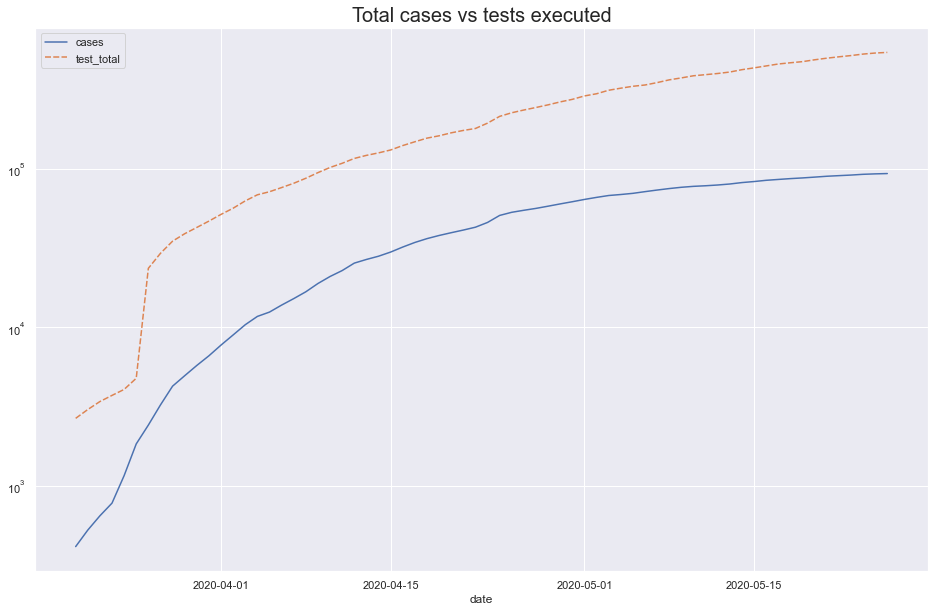

In [7]:
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

## Daily new cases

In [8]:
@interact
def show_daily_stats(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return evolution_df.iloc[-days:]

,cases,deaths,test_total
date,,,
2020-05-20,1045.0,128.0,13013.0
2020-05-21,1114.0,82.0,11533.0
2020-05-22,805.0,80.0,10158.0
2020-05-23,773.0,76.0,9342.0
2020-05-24,1013.0,68.0,11387.0
2020-05-25,596.0,44.0,8188.0
2020-05-26,422.0,57.0,4920.0


## Daily percent change

In [9]:
@interact
def show_daily_pct_change(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return to_pct_string(df.pct_change().iloc[-7:])

,cases,deaths,test_positive,test_total
date,,,,
2020-05-20,1.19%,2.16%,1.19%,2.73%
2020-05-21,1.25%,1.35%,1.25%,2.35%
2020-05-22,0.89%,1.30%,0.89%,2.03%
2020-05-23,0.85%,1.22%,0.85%,1.83%
2020-05-24,1.11%,1.08%,1.11%,2.19%
2020-05-25,0.64%,0.69%,0.64%,1.54%
2020-05-26,0.45%,0.89%,0.45%,0.91%
